In [1]:
#!pip3 install scipy
#!pip3 install matplotlib

from scipy.io import wavfile
samplerate, data = wavfile.read('soundfiles/hbd_slow_speed.wav')

data_size = data.shape[0]
song_length_seconds = data_size/samplerate

print(data_size)
print(samplerate)
print(song_length_seconds)

1220608
48000
25.429333333333332


No handles with labels found to put in legend.


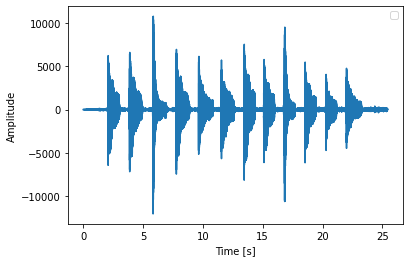

In [2]:
import matplotlib.pyplot as plt
import numpy as np

time_domain = np.linspace(0, song_length_seconds, data_size)

plt.plot(time_domain, data)
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()


No handles with labels found to put in legend.


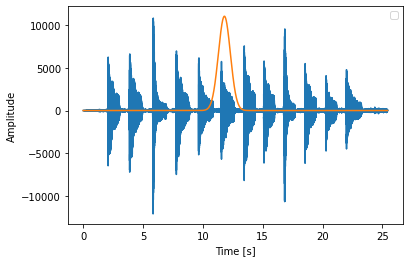

In [3]:
gaussian = 11000*np.exp(-2*np.power(time_domain - 11.8, 2))

plt.plot(time_domain, data)
plt.plot(time_domain, gaussian)
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

#[2.2, 4.25, 6]

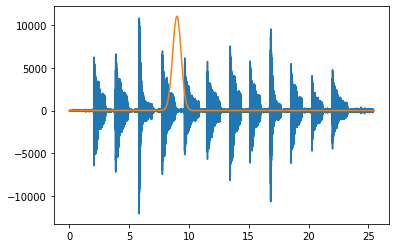

In [4]:
from IPython.display import clear_output

for i in range(10):
    clear_output(wait=True)
    gaussian = 11000*np.exp(-4*np.power(time_domain - i, 2))
    plt.plot(time_domain, data)
    plt.plot(time_domain, gaussian)
    plt.pause(0.2)


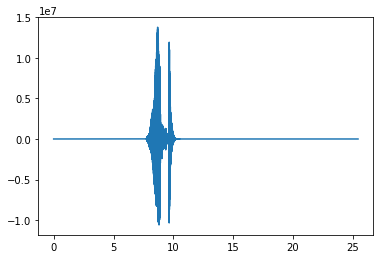

In [14]:
from IPython.display import clear_output

for i in [2.2, 4.25, 6]:
    clear_output(wait=True)
    gaussian = 11000*np.exp(-4*np.power(time_domain - i, 2))
    plt.plot(time_domain, data*gaussian)
    plt.pause(0.2)


250.5002052257587


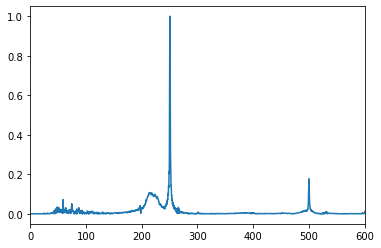

In [31]:
from scipy.fftpack import fft, fftshift
Fs = data_size/25
f = np.linspace(-Fs/2,Fs/2,data_size)

results = []

for i in [2.2, 4.25, 6, 8, 10, 11.8]:
    clear_output(wait=True)
    plt.xlim([0, 600])
    gaussian = 11000*np.exp(-2*np.power(time_domain - i, 2))

    gaussian_filtered = data*gaussian

    freq = abs(fft(gaussian_filtered)/data_size)
    shifted = fftshift(freq/abs(freq).max())

    results.append(shifted)
    
    plt.plot(f, shifted)
    plt.pause(1)

In [36]:
for i in range(results.shape[0]):
    print(abs(f[results[i].argmax()]))


197.78016203413426
197.82016206690605
223.70018326946956
197.78016203413426
266.18021807182595
250.5002052257587
